## Import necessary libraries

In [15]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Extract csv file

In [16]:
data = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


## Extract Categorical Data Type


#### Perform Mapping Of the 3 categorical predictors


In [17]:
flat_type = pd.DataFrame(data[['flat_type']])
mapping = {'1 ROOM': 1, '2 ROOM': 2, '3 ROOM': 3, '4 ROOM': 4, '5 ROOM': 5, 'EXECUTIVE': 6, 'MULTI-GENERATION': 7}
data['flat_type_num'] = flat_type['flat_type'].map(mapping)

storey_range = pd.DataFrame(data[['storey_range']])
mapping = {'01 TO 03': 2, '04 TO 06': 5, '07 TO 09': 8, '10 TO 12': 11, '13 TO 15': 14, '16 TO 18': 17, '19 TO 21': 20, '22 TO 24': 23, '25 TO 27': 26, '28 TO 30': 29, '31 TO 33': 32, '34 TO 36': 35, '37 TO 39': 38, '40 TO 42': 41}
data['Story_range_num'] = storey_range["storey_range"].map(mapping)

flat_model = pd.DataFrame(data[['flat_model']])
mapping = {'2-room': 1, 'Adjoined flat': 2, 'Apartment': 3, 'Improved': 4, 'Improved-Maisonette': 5, 'Maisonette': 6, 'Model A': 7, 'Model A-Maisonette': 8, 'Model A2': 9, 'Multi Generation': 10, 'New Generation': 11, 'Premium Apartment': 12, 'Premium Maisonette': 13, 'Simplified': 14, 'Standard': 15, 'Terrace': 16}
data['flat_model_num'] = flat_model['flat_model'].map(mapping)

In [21]:
CatData = pd.DataFrame(data[['flat_type_num', 'Story_range_num','flat_model_num']])
CatData.head()

,flat_type_num,Story_range_num,flat_model_num
0,3,8,4
1,3,5,4
2,3,8,11
3,3,8,11
4,3,8,11


In [22]:
CatData.describe()

,flat_type_num,Story_range_num,flat_model_num
count,369651.000000,369651.000000,369651.000000
mean,4.036442,7.497017,7.841505
std,0.934767,4.518521,3.586141
min,1.000000,2.000000,1.000000
25%,3.000000,5.000000,4.000000
50%,4.000000,8.000000,7.000000
75%,5.000000,11.000000,11.000000
max,7.000000,41.000000,16.000000


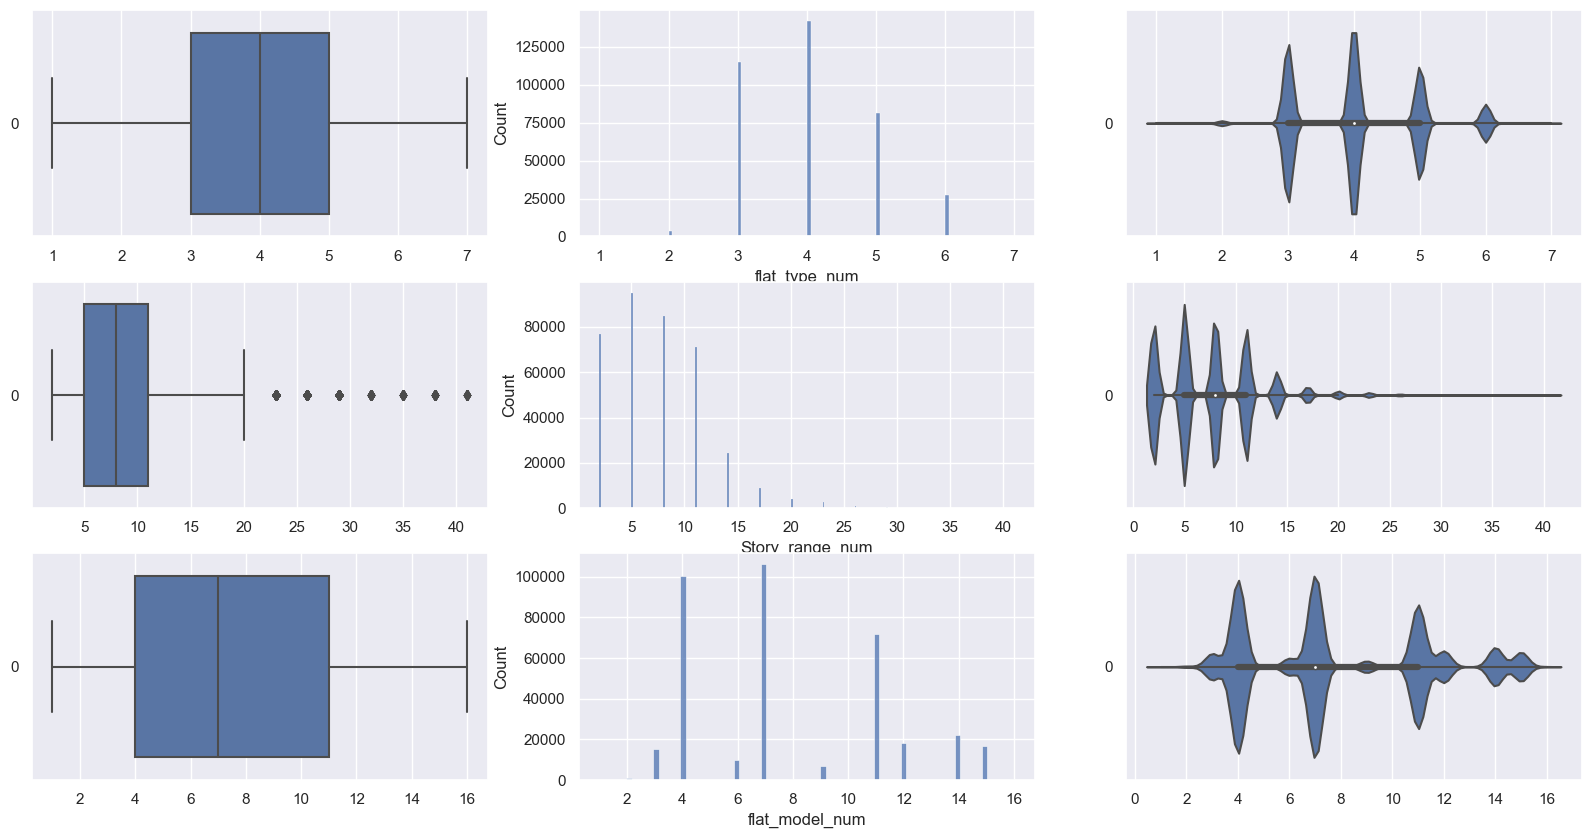

In [23]:
# Draw the distributions of all variables
f, axes = plt.subplots(3, 3, figsize=(20, 10))

count = 0
for var in CatData:
    sb.boxplot(data = CatData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = CatData[var], ax = axes[count,1])
    sb.violinplot(data = CatData[var], orient = "h", ax = axes[count,2])
    count += 1

## Correlation of predictors and resale_price

                 flat_type_num  Story_range_num  flat_model_num  resale_price
flat_type_num         1.000000         0.111050       -0.395737      0.705449
Story_range_num       0.111050         1.000000       -0.102750      0.219342
flat_model_num       -0.395737        -0.102750        1.000000     -0.306949
resale_price          0.705449         0.219342       -0.306949      1.000000


<Axes: >

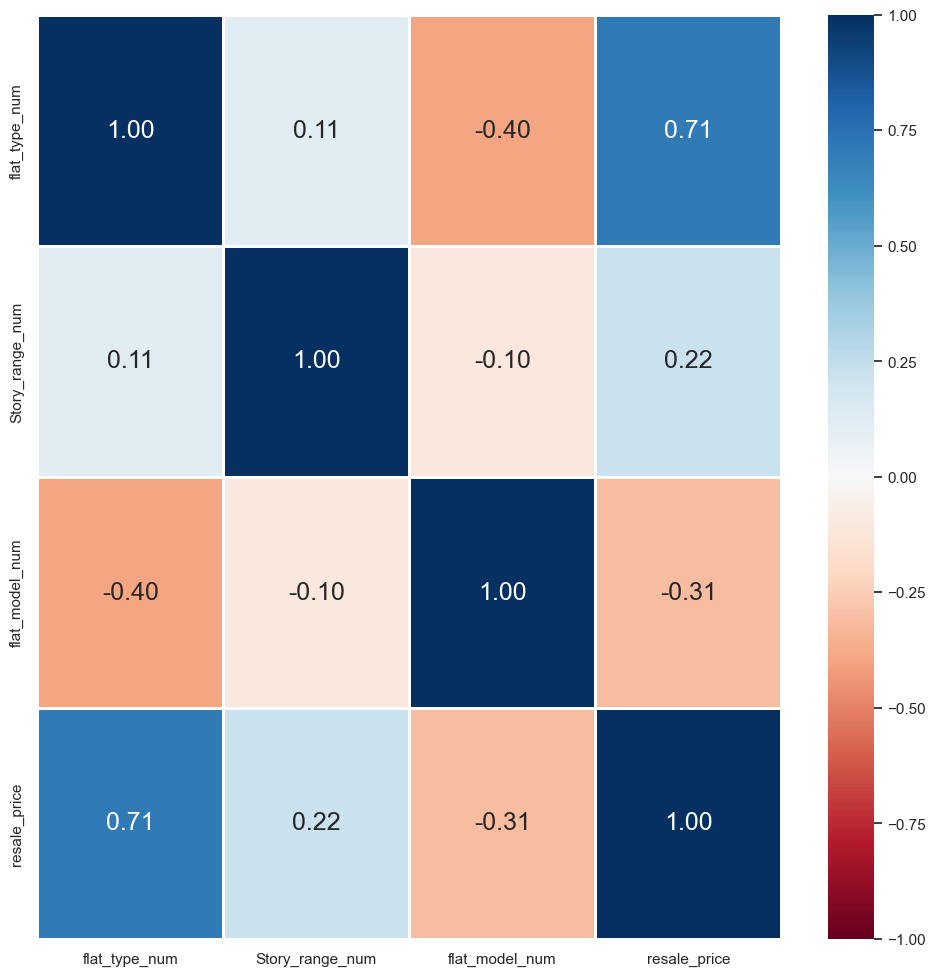

In [24]:
# Add ResalePrice to the dataframe
CatData = pd.concat([CatData, data["resale_price"]], axis = 1).reindex(CatData.index)

# Correlation Matrix
print(CatData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(CatData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

## Pairplot for the data

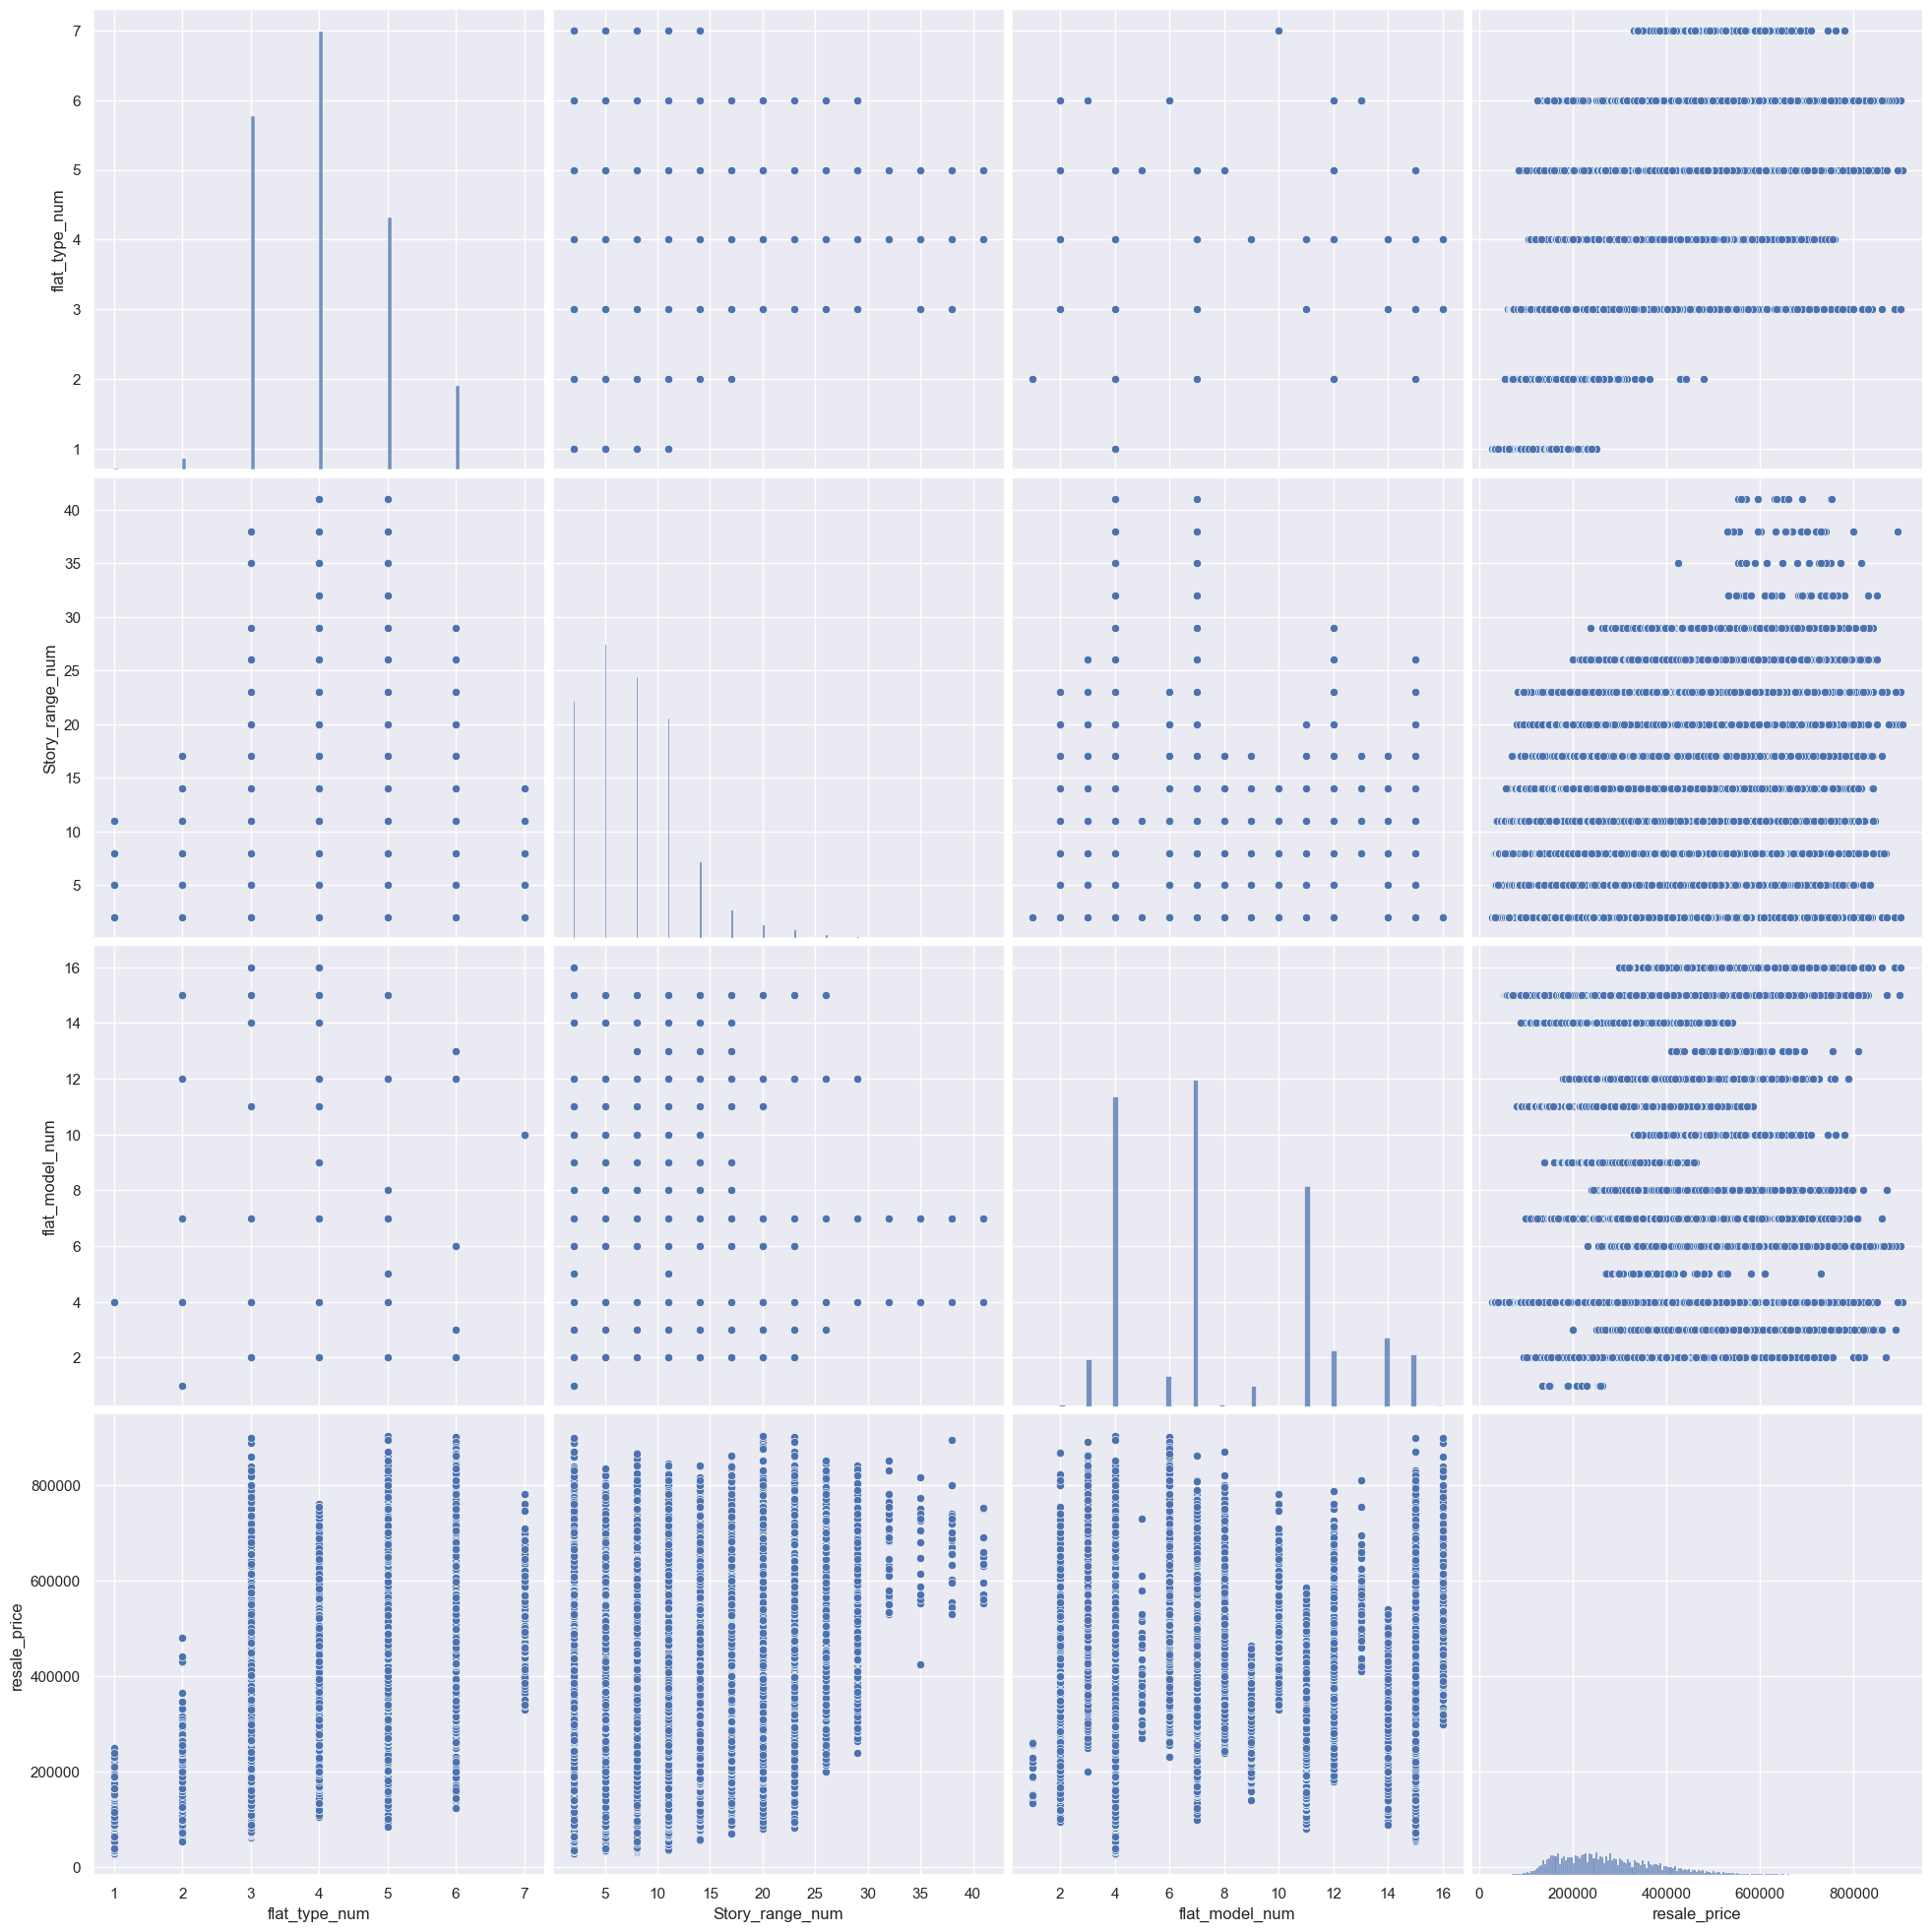

In [25]:
# Draw pairs of variables against one another
sb.pairplot(data = CatData, height = 5)

**Best predictor for `resale_price`**     

> `flat_type_num` : Possibly the most important variable : Highest Correlation, Strong Linearity      
> `Story_range_num` : Doesn't seem so important as a variable : Low Correlation, Weak Linear Relation <br>
> `flat_model_num` : Doesn't seem so important as a variable : Low Correlation, Weak Linear Relation

From the above information, `flat_type_num` as the only top *individual* predictors to predict `resale_price`. We will explore using machine learning models
